In [98]:
#pip install missingno
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import missingno as msno


# Set random seed.
np.random.seed(42)

In [99]:
df=pd.read_csv("dept_score.csv")

In [100]:
df.head()

,dept,score
0,finance,5.0
1,accounting,4.0
2,finance,NaN
3,accounting,5.0
4,finance,NaN


<Axes: >

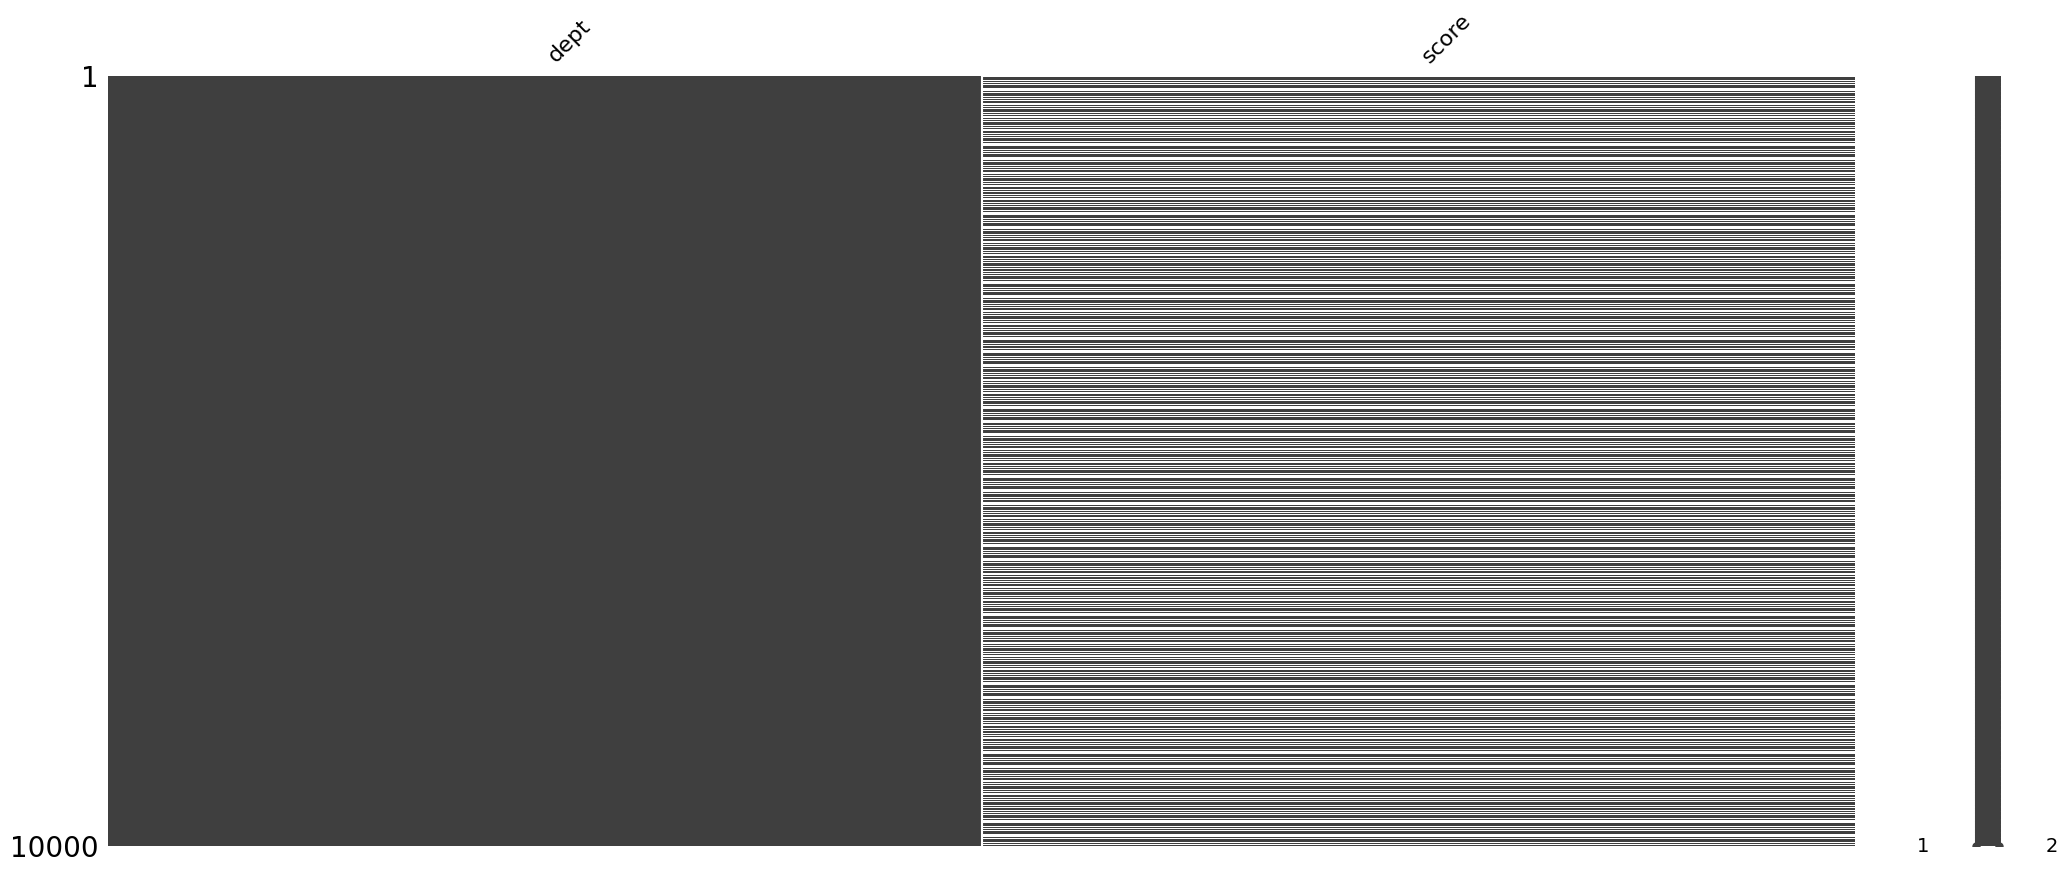

In [101]:
msno.matrix(df)

In [102]:
one_hot_encoded_data = pd.get_dummies(df, columns = ["dept"])
print(one_hot_encoded_data)

      score  dept_accounting  dept_finance
0       5.0                0             1
1       4.0                1             0
2       NaN                0             1
3       5.0                1             0
4       NaN                0             1
...     ...              ...           ...
9995    7.0                1             0
9996    NaN                0             1
9997    5.0                1             0
9998    NaN                0             1
9999    6.0                1             0

[10000 rows x 3 columns]


In [103]:
df.isnull().sum()

dept        0
score    4464
dtype: int64

In [104]:
# create a function to compare histograms of original & imputed data
def compare_histograms(imputed_column, original_column, x_label, y_label = 'Frequency'):
    fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, figsize = (16,9))

    # Set axes of histograms.
    mode = statistics.mode(imputed_column)
    rnge = max(original_column) - min(original_column)
    xmin = min(original_column) - 0.02 * rnge
    xmax = max(original_column) + 0.02 * rnge
    ymax = 40

    ax0.set_xlim(xmin, xmax)
    ax0.set_ylim(0, ymax)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(0, ymax)

    # Set top labels.
    ax0.set_title('Real Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax0.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax0.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax0.set_xticks([])
    ax0.set_yticks([])

    # Generate top histogram.
    ax0.hist(original_column, bins = 15, color = '#185fad', alpha = 0.75, label = '')
    ax0.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax0.legend(prop={'size': 15}, loc = 1)

    # Set bottom labels.
    ax1.set_title('Imputed Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax1.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax1.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Generate bottom histogram.
    ax1.hist(imputed_column, bins = 15, color = 'orange', alpha = 0.75, label = '', stacked = True)
    ax1.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax1.axvline(np.mean(imputed_column), color = 'darkorange', lw = 5, label = 'Imputed Mean')
    ax1.legend(prop={'size': 15}, loc = 1)

    plt.tight_layout();

In [105]:
# Which columns have missing values?
df.isnull().sum()

dept        0
score    4464
dtype: int64

In [106]:
# Let's impute missing values in the age column with the mean
mean_score = np.mean(df["score"])

In [107]:
mean_score

5.724530346820809

In [108]:
df["score_mean_imputed"]=df["score"].fillna(mean_score)

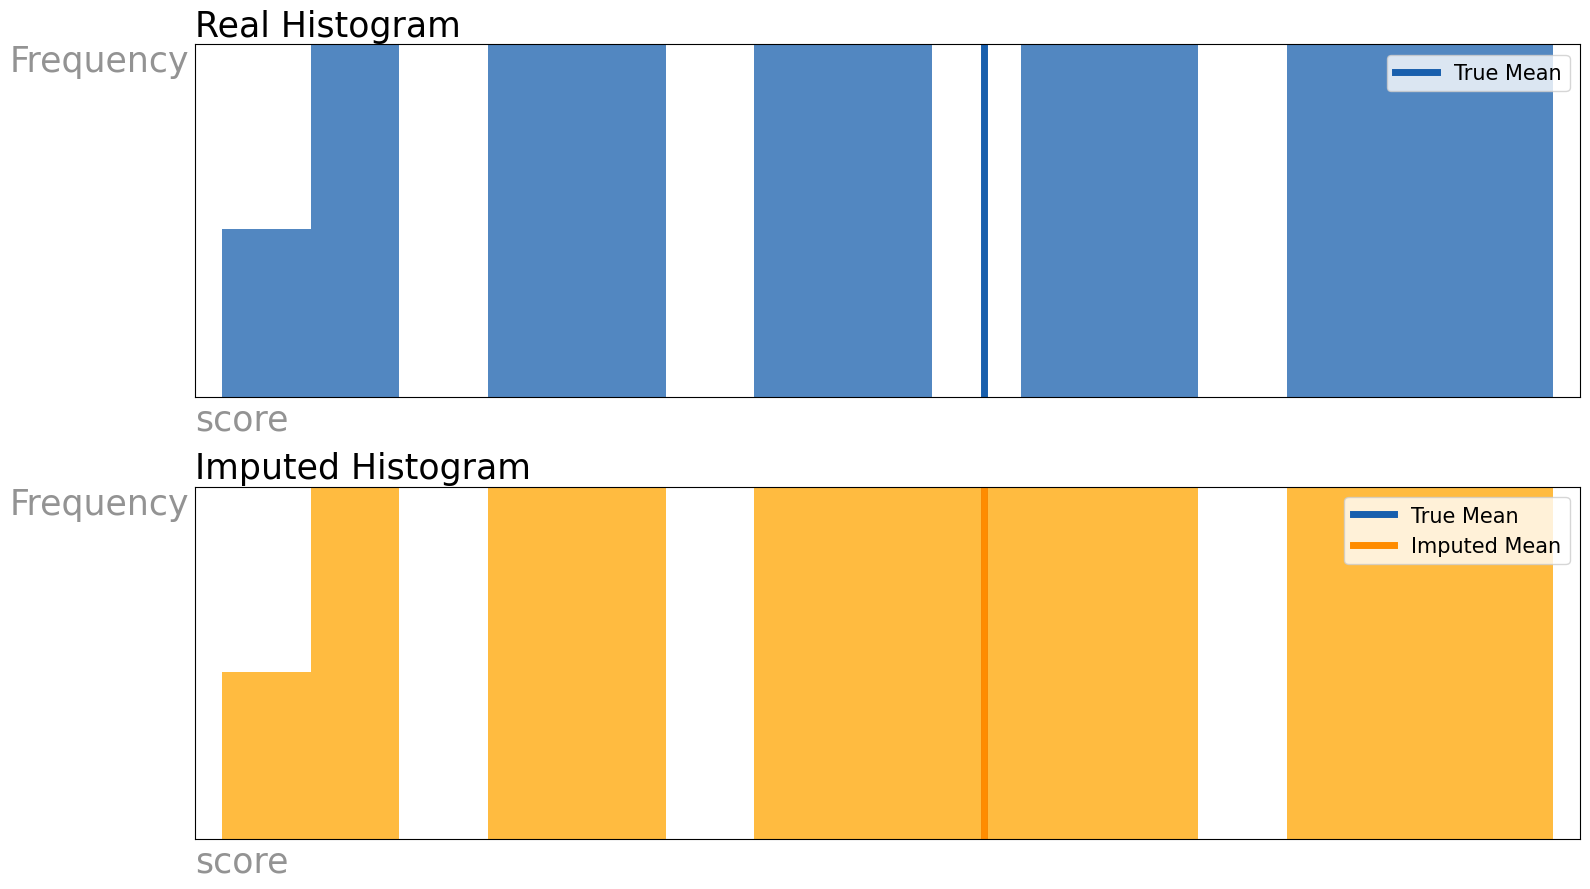

In [109]:
compare_histograms(imputed_column = df["score_mean_imputed"],
                   original_column = df["score"],
                   x_label = "score",
                   y_label = 'Frequency')

In [110]:
# Let's impute missing values in the age column with the median
med_score = np.median(df["score"].dropna())

In [111]:
med_score

6.0

In [112]:
df["score_med_imputed"]=df["score"].fillna(med_score)

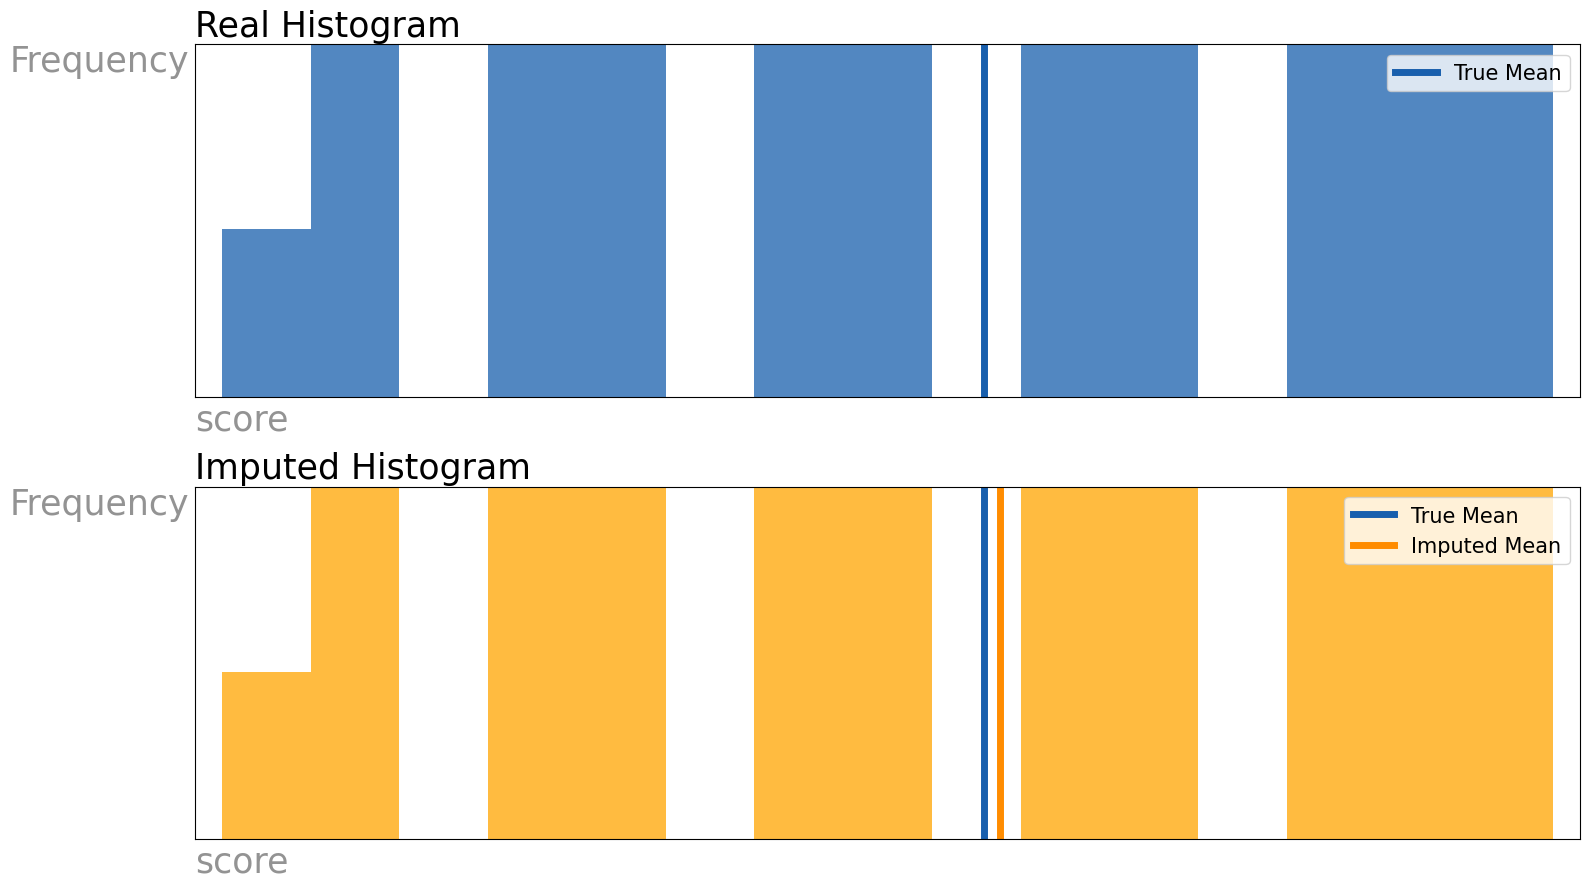

In [113]:
compare_histograms(imputed_column = df["score_med_imputed"],
                   original_column = df["score"],
                   x_label = "score",
                   y_label = 'Frequency')

In [114]:
# Let's impute missing values in the age column with the mode
mode_score = statistics.mode(df["score"])

In [115]:
mode_score

5.0

In [116]:
df["score_mode_imputed"]=df["score"].fillna(mode_score)

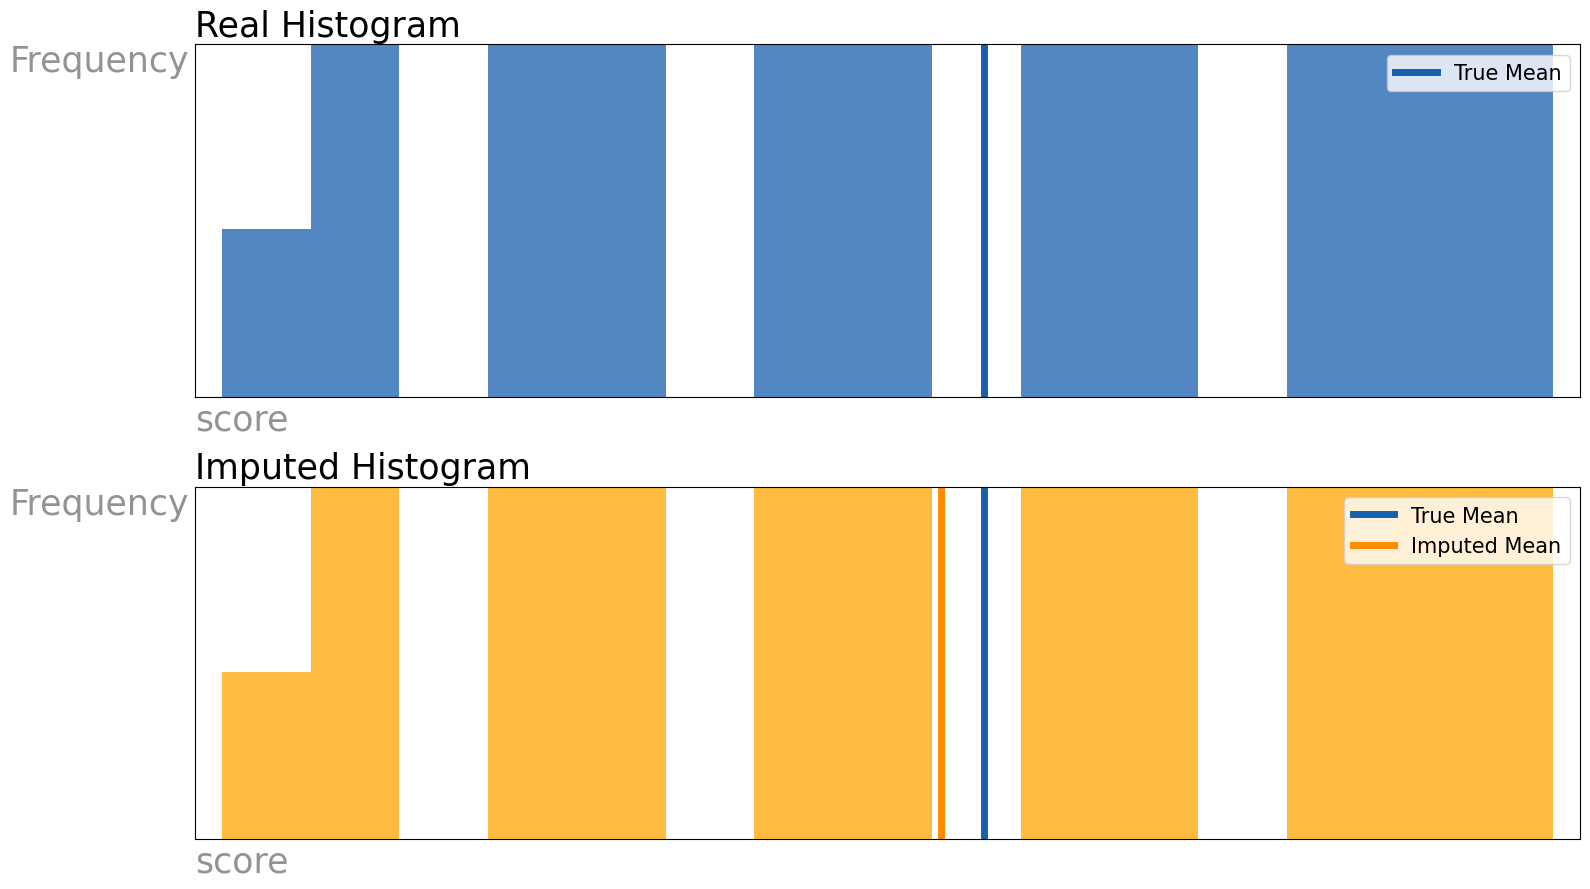

In [117]:
compare_histograms(imputed_column = df["score_mode_imputed"],
                   original_column = df["score"],
                   x_label = "score",
                   y_label = 'Frequency')

In [118]:
###########     Make your life easier -> Simple Imputer in sklearn   ####   method 2.
#Make your life easier -> Simple Imputer in sklearn
#Note: Train-test-split BEFORE doing this if you are going to model later to avoid data leakage!

In [119]:
# import simple imputer
from sklearn.impute import SimpleImputer

In [120]:
#re-load data
df=pd.read_csv("/content/housing.csv")

In [121]:
df.isnull().sum()

Neighborhood                0
Building.Classification     0
Total.Units                 0
Year.Built                 96
Gross.SqFt                  0
Estimated.Gross.Income      0
Gross.Income.per.SqFt       0
Estimated.Expense           0
Expense.per.SqFt            0
Net.Operating.Income        0
Full.Market.Value           0
Market.Value.per.SqFt       0
Boro                        0
dtype: int64

In [122]:
df.dtypes

Neighborhood                object
Building.Classification     object
Total.Units                  int64
Year.Built                 float64
Gross.SqFt                   int64
Estimated.Gross.Income       int64
Gross.Income.per.SqFt      float64
Estimated.Expense            int64
Expense.per.SqFt           float64
Net.Operating.Income         int64
Full.Market.Value            int64
Market.Value.per.SqFt      float64
Boro                        object
dtype: object

In [123]:
df['Neighborhood']=df['Neighborhood'].astype("category")
df['Neighborhood']=df['Neighborhood'].cat.codes

In [124]:
df['Building.Classification']=df['Building.Classification'].astype("category")
df['Building.Classification']=df['Building.Classification'].cat.codes

In [125]:
df['Boro']=df['Boro'].astype("category")
df['Boro']=df['Boro'].cat.codes

In [126]:
imp = SimpleImputer(strategy = 'mean')
imp_df= imp.fit_transform(df)

In [127]:
pd.DataFrame(imp_df, columns = df.columns).head(10)

,Neighborhood,Building.Classification,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value,Market.Value.per.SqFt,Boro
0,44.0,2.0,42.0,1920.000000,36500.0,1332615.0,36.51,342005.0,9.37,990610.0,7300000.0,200.00,2.0
1,44.0,1.0,78.0,1985.000000,126420.0,6633257.0,52.47,1762295.0,13.94,4870962.0,30690000.0,242.76,2.0
2,44.0,3.0,500.0,1967.460474,554174.0,17310000.0,31.24,3543000.0,6.39,13767000.0,90970000.0,164.15,2.0
3,44.0,1.0,282.0,1930.000000,249076.0,11776313.0,47.28,2784670.0,11.18,8991643.0,67556006.0,271.23,2.0
4,131.0,1.0,239.0,1985.000000,219495.0,10004582.0,45.58,2783197.0,12.68,7221385.0,54320996.0,247.48,2.0
5,131.0,1.0,133.0,1986.000000,139719.0,5127687.0,36.70,1497788.0,10.72,3629899.0,26737996.0,191.37,2.0
6,131.0,1.0,109.0,1985.000000,105000.0,4365900.0,41.58,1273650.0,12.13,3092250.0,22210281.0,211.53,2.0
7,131.0,1.0,107.0,1986.000000,87479.0,3637377.0,41.58,1061120.0,12.13,2576257.0,19449002.0,222.33,2.0
8,131.0,1.0,247.0,1987.000000,255845.0,11246946.0,43.96,2440761.0,9.54,8806185.0,66316999.0,259.21,2.0
9,131.0,1.0,121.0,1985.000000,106129.0,4115683.0,38.78,1231096.0,11.60,2884587.0,21821999.0,205.62,2.0


In [128]:
###   Method 3: Single Regression Imputation-------

In [129]:
# re-load data
df = pd.read_csv('/content/dept_score.csv')

In [130]:
df.head()

,dept,score
0,finance,5.0
1,accounting,4.0
2,finance,NaN
3,accounting,5.0
4,finance,NaN


In [131]:
df.columns

Index(['dept', 'score'], dtype='object')

In [132]:
df['dept']=df['dept'].astype("category")
df['dept']=df['dept'].cat.codes

In [133]:
# Import linear regression
from sklearn.linear_model import LinearRegression

In [134]:
# Save new dataframe without any missing values

income_new = df.dropna()

In [135]:
# Set up model
X_columns = income_new[['dept']]
impute_columns = income_new['score']

# Instantiate

model = LinearRegression()

# Fit

model.fit(X_columns,impute_columns)

LinearRegression()

In [136]:
# save indices of missing values
missing_idx = df.index[df['score'].isnull()]

In [137]:
# Impute missing values with the prediciton from the model
df['score_regression_imputed'] = [df.loc[i,'score'] if i not in missing_idx
     else model.predict(pd.DataFrame(df.loc[i,['dept']]).T)[0]
     for i in range(df.shape[0])]

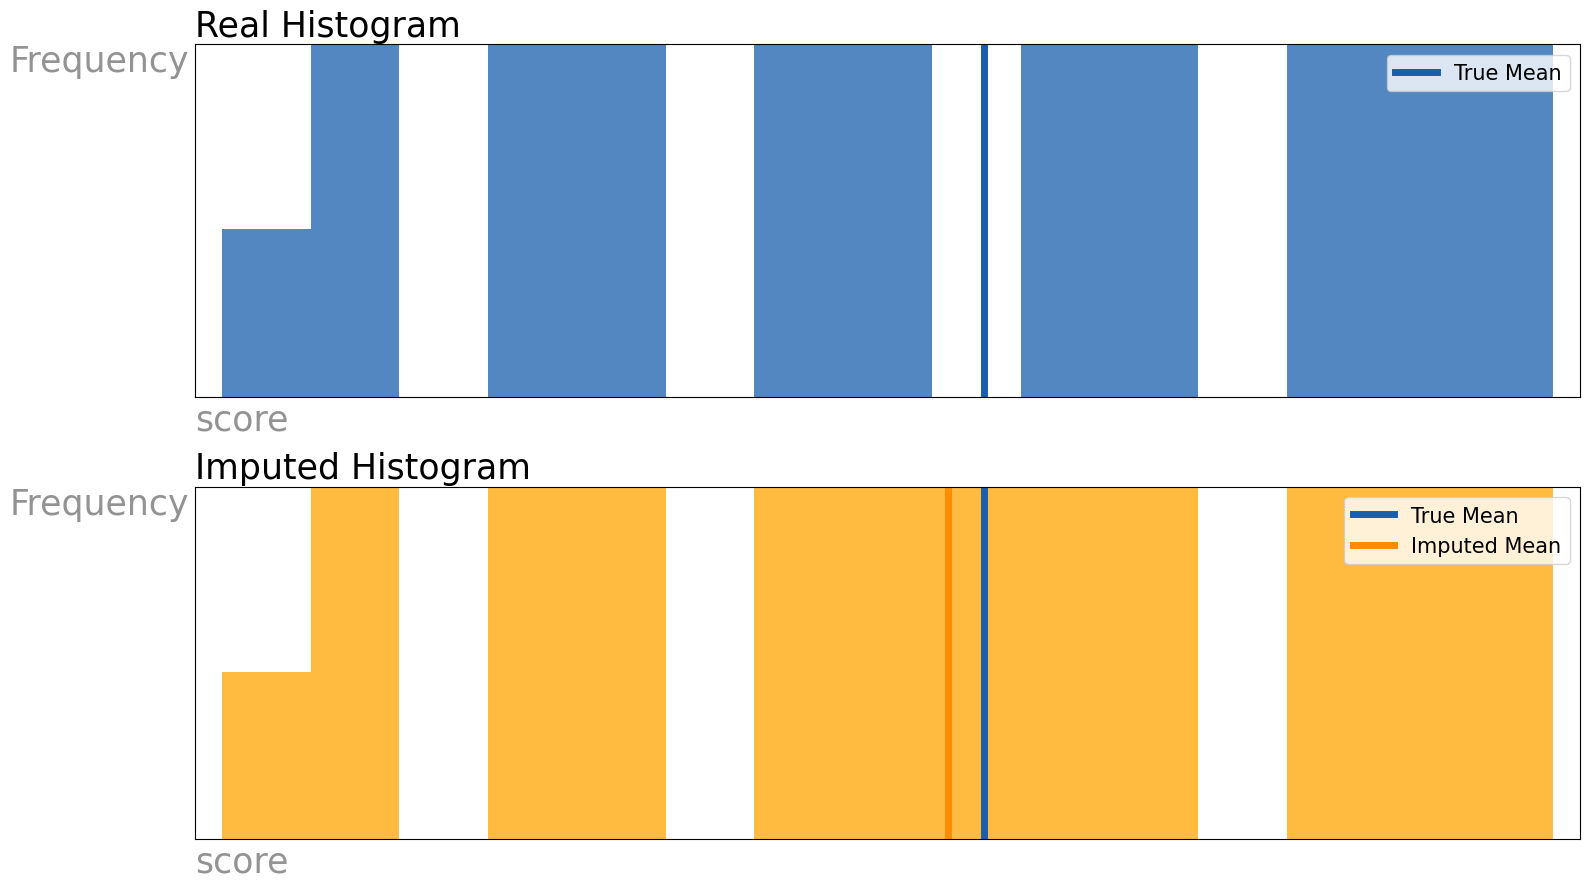

In [138]:
compare_histograms(imputed_column = df['score_regression_imputed'],
                   original_column = df['score'],
                   x_label = 'score',
                   y_label = 'Frequency')

In [139]:
#Make your life easier -> Iterative Imputer in sklearn
#Documentation here.

#From sklearn:

#Note: This estimator is still experimental for now: the predictions and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_iterative_imputer:

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
#Again, make sure to fit this only on training data if you are using this for a model (you can transform testing data)

In [140]:
# imports
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [141]:
# re-load data
income_missing = pd.read_csv('/content/dept_score.csv')

In [142]:
df['dept']=df['dept'].astype("category")
df['dept']=df['dept'].cat.codes

In [143]:
df.head()

,dept,score,score_regression_imputed
0,1,5.0,5.0000
1,0,4.0,4.0000
2,1,NaN,4.9512
3,0,5.0,5.0000
4,1,NaN,4.9512


In [144]:
it_imp = IterativeImputer(estimator = LinearRegression())
it_imp_df = it_imp.fit_transform(df)
it_imp_df = pd.DataFrame(it_imp_df, columns = df.columns)

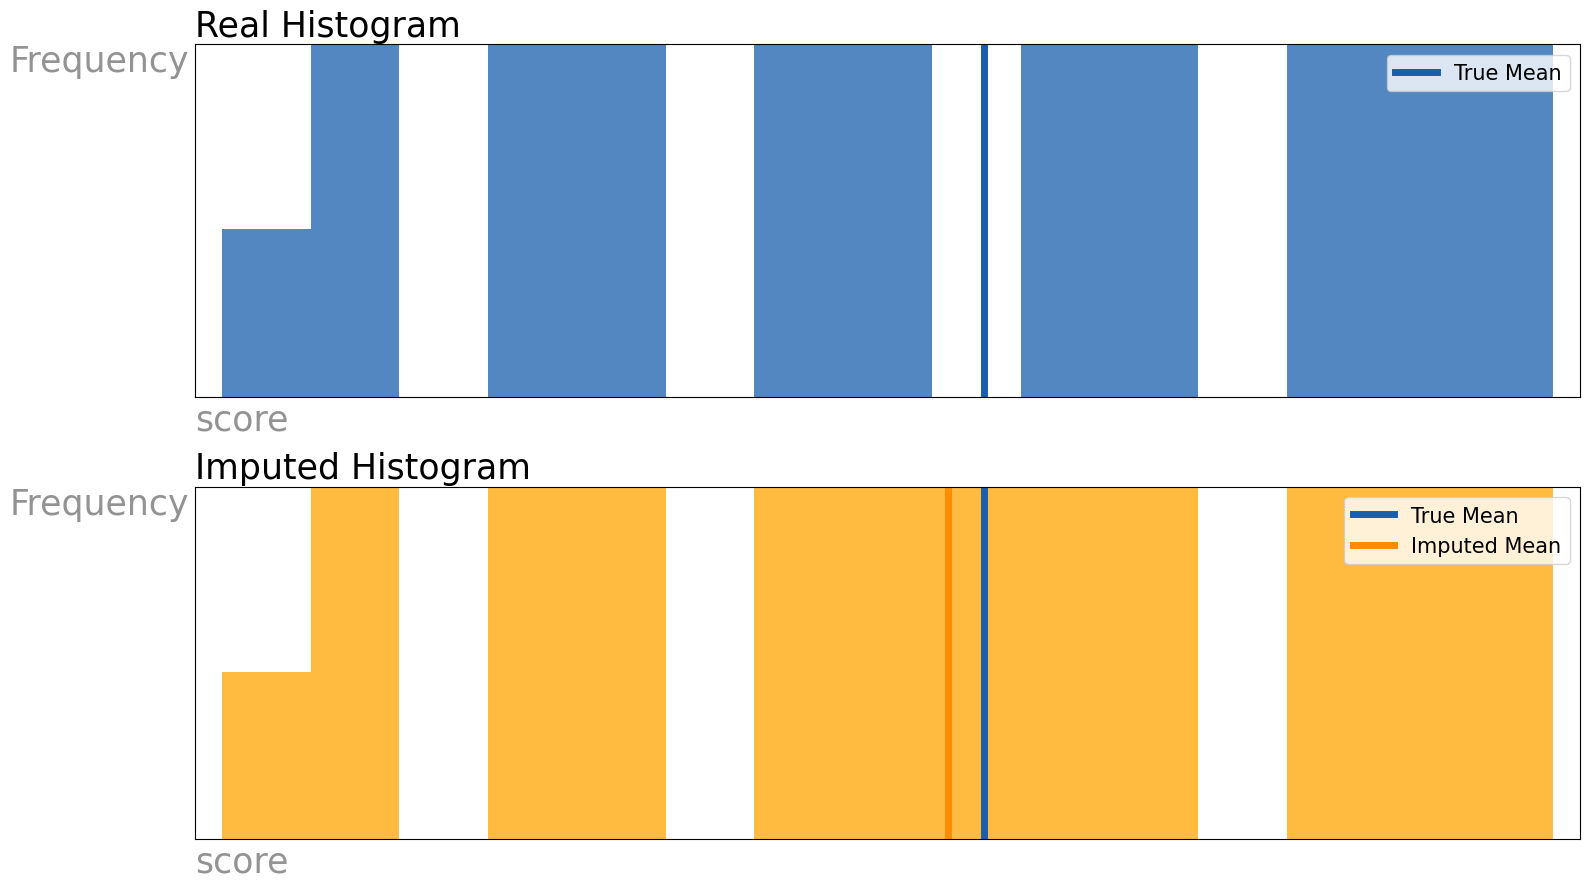

In [145]:
compare_histograms(imputed_column = it_imp_df['score'],
                   original_column = income_missing['score'],
                   x_label = 'score',
                   y_label = 'Frequency')

In [146]:
# try it with the default model
income_missing = pd.read_csv('/content/dept_score.csv')
it_imp = IterativeImputer()



In [147]:
df['dept']=df['dept'].astype("category")
df['dept']=df['dept'].cat.codes

In [148]:
df.head()

,dept,score,score_regression_imputed
0,1,5.0,5.0000
1,0,4.0,4.0000
2,1,NaN,4.9512
3,0,5.0,5.0000
4,1,NaN,4.9512


In [149]:
it_imp_df = it_imp.fit_transform(df)
it_imp_df = pd.DataFrame(it_imp_df, columns = df.columns)

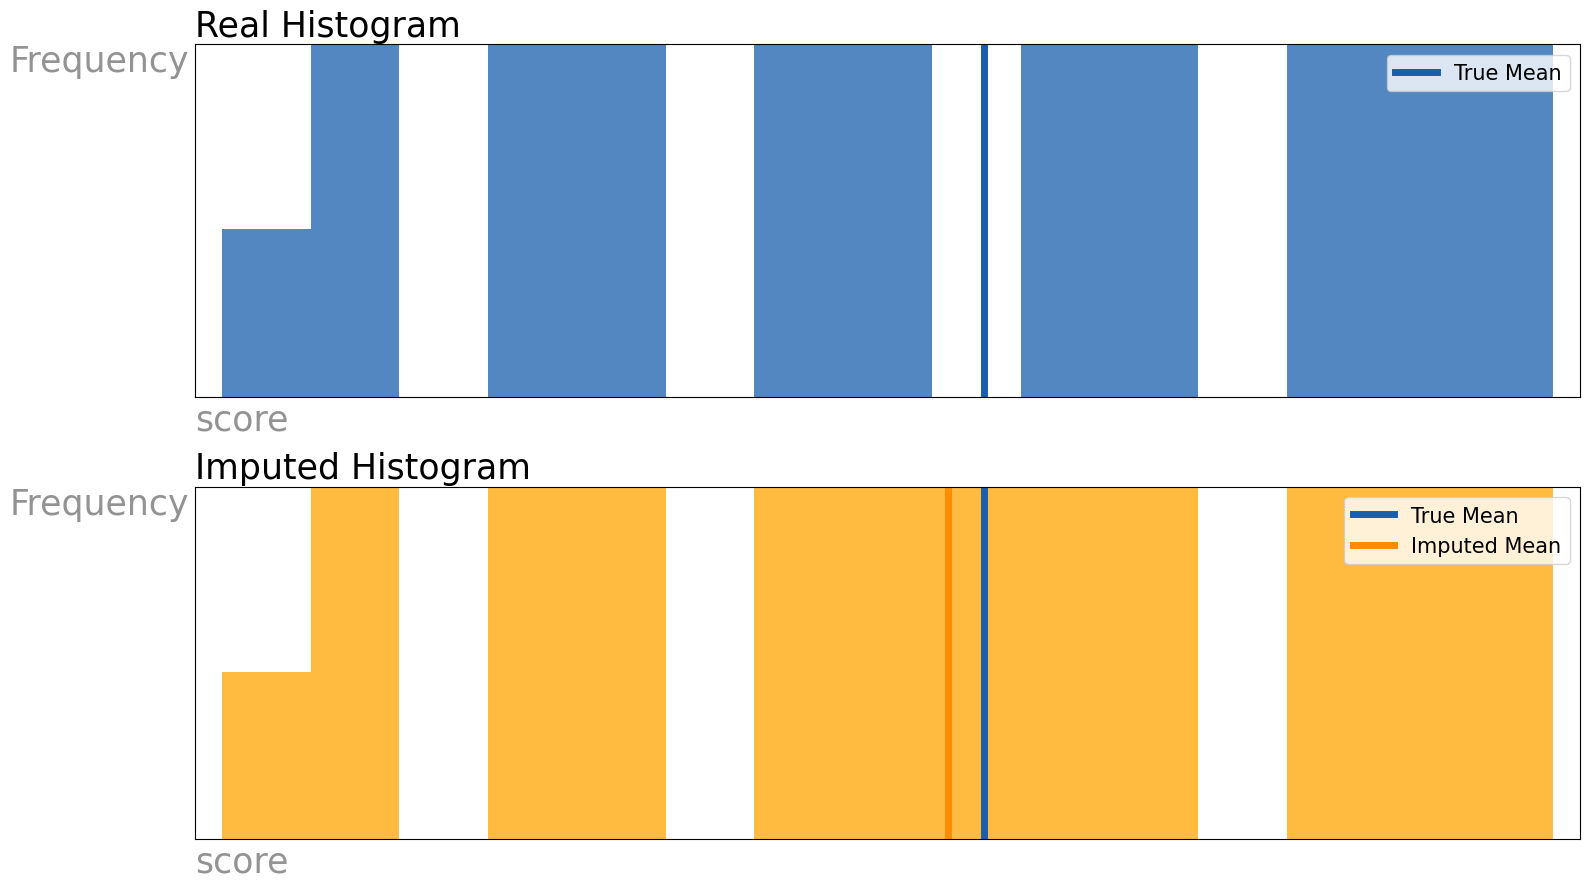

In [150]:
compare_histograms(imputed_column = it_imp_df['score'],
                   original_column = df['score'],
                   x_label = 'score',
                   y_label = 'Frequency')

In [151]:
## Method 4: Nearest Neighbors Imputation

In [152]:
# import it
from sklearn.impute import KNNImputer

In [153]:
# re-load data
df = pd.read_csv('/content/dept_score.csv')

In [154]:
df.head()

,dept,score
0,finance,5.0
1,accounting,4.0
2,finance,NaN
3,accounting,5.0
4,finance,NaN


In [155]:
df['dept']=df['dept'].astype("category")
df['dept']=df['dept'].cat.codes

In [156]:
knn_imp = KNNImputer()
knn_imp_df= knn_imp.fit_transform(df)
knn_imp_df = pd.DataFrame(knn_imp_df, columns = df.columns)

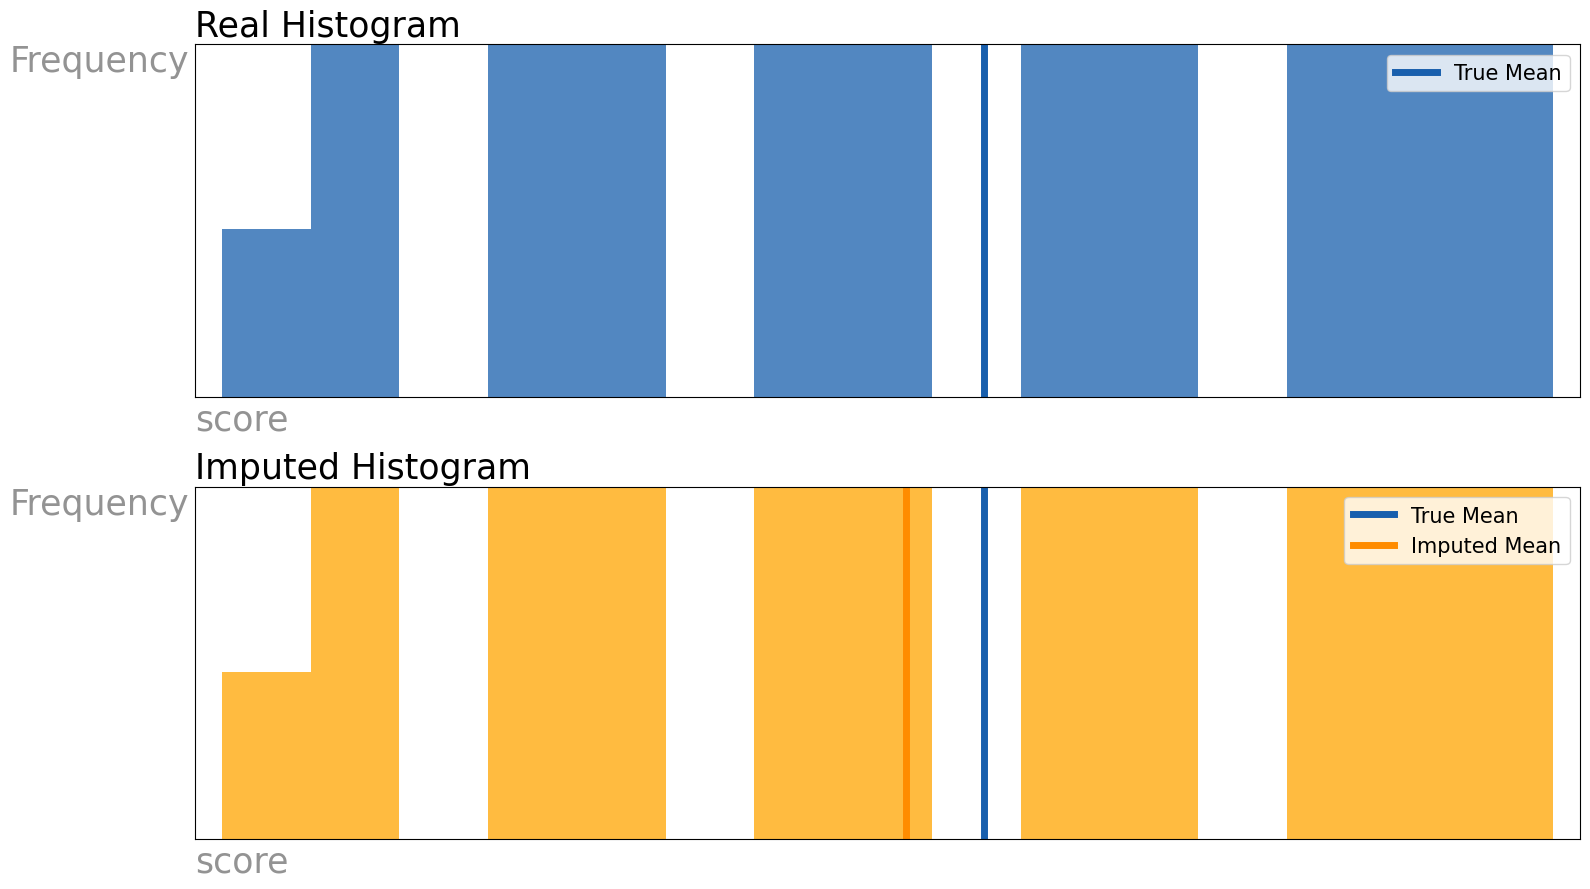

In [157]:
compare_histograms(imputed_column = knn_imp_df['score'],
                   original_column = df['score'],
                   x_label = 'score',
                   y_label = 'Frequency')

In [158]:
###Method 5: Multiple Imputation
#If we want to account for the randomness in our data, we can fill in missing values with some amount of randomness/uncertainty.

#Replacing an NA with one value treats things like we know the true value.

#Therefore, we need to impute multiple times.

In [159]:
#Missing Indicator Column
#We can add a column about which values were imputed/missing and use that as a feature in our model. This can help when there is a pattern in what is missing and our target and may help our model.

#See another example of this here.

#There are several ways we can do this:

#Set add_indicator = True in Simple Imputer or Iterative Imputer if you are using these:
#imputer = SimpleImputer(add_indicator=True)
#imputer.fit_transform(X)
#Use the MissingIndicator transformer in sklearn.

In [160]:
# re-load data
income_missing = pd.read_csv('/content/dept_score.csv')

In [161]:
income_missing.head()

,dept,score
0,finance,5.0
1,accounting,4.0
2,finance,NaN
3,accounting,5.0
4,finance,NaN


In [162]:
income_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dept    10000 non-null  object 
 1   score   5536 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [163]:
X=income_missing["score"]

In [164]:
X.value_counts()

5.0     931
6.0     832
4.0     766
7.0     718
3.0     570
8.0     563
10.0    407
9.0     328
2.0     316
1.0      86
0.0      19
Name: score, dtype: int64

In [165]:
X = pd.DataFrame({'score':[5.0,4.0, np.nan, 5.0]})

In [166]:
X

,score
0,5.0
1,4.0
2,NaN
3,5.0


In [167]:
from sklearn.impute import SimpleImputer

In [168]:
# impute the mean
imputer = SimpleImputer()
imputer.fit_transform(X)

array([[5.        ],
       [4.        ],
       [4.66666667],
       [5.        ]])

In [169]:
# impute the mean and add an indicator matrix ()
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(X)

array([[5.        , 0.        ],
       [4.        , 0.        ],
       [4.66666667, 1.        ],
       [5.        , 0.        ]])

#end